In [8]:
import pandas as pd
import numpy as np
import pickle

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, f1_score

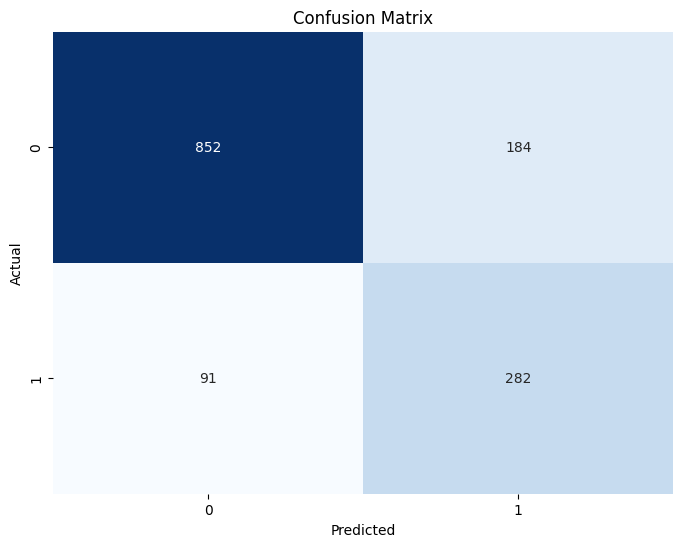

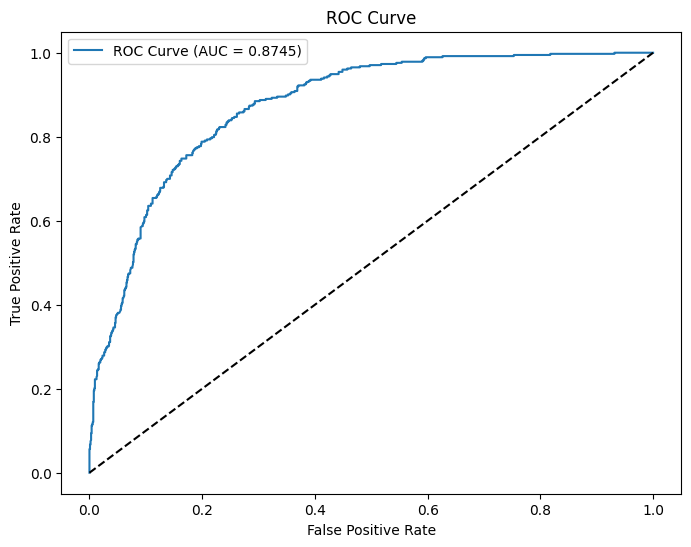

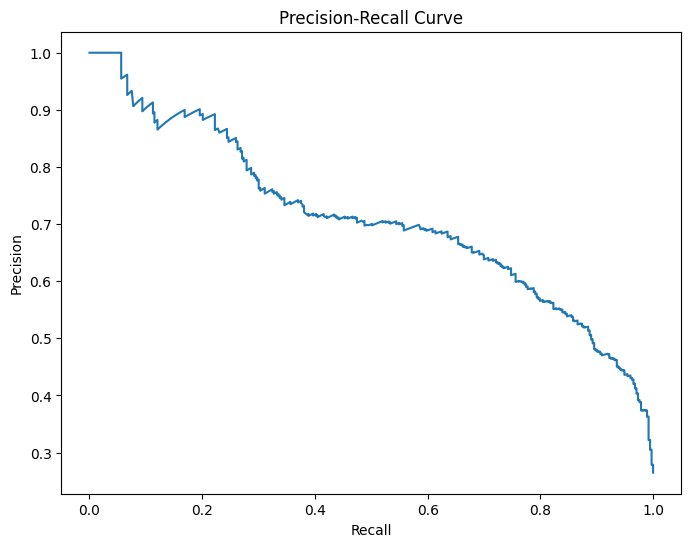

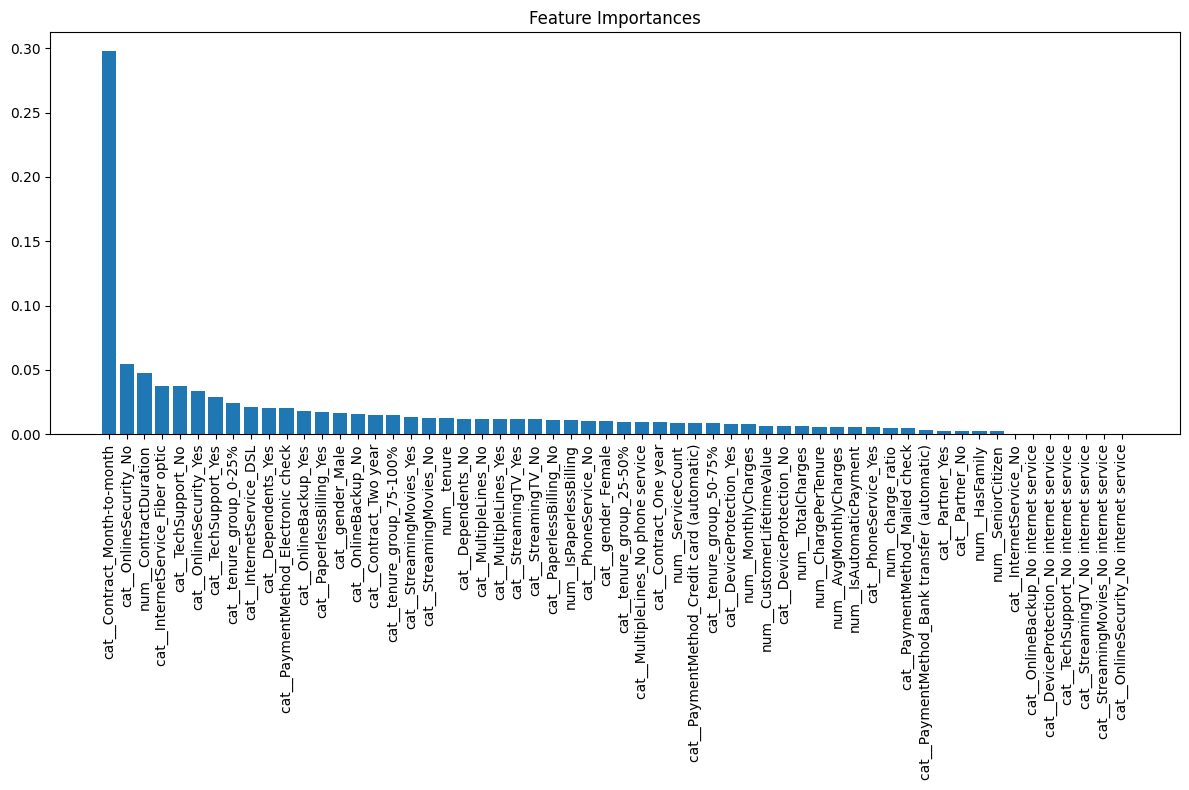

Model Performance Metrics:
Accuracy: 0.8048
Precision: 0.6052
Recall: 0.7560
F1 Score: 0.6722
ROC AUC: 0.8745

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1036
           1       0.61      0.76      0.67       373

    accuracy                           0.80      1409
   macro avg       0.75      0.79      0.77      1409
weighted avg       0.82      0.80      0.81      1409



In [9]:
# Load data and model
df = pd.read_csv('C:/churn_prediction/notebooks/data/processed/telco_engineered.csv')
with open('C:/churn_prediction/notebooks/models/tuned_churn_model_xgb_smote.pkl', 'rb') as f:
    model = pickle.load(f)

# Define features and target
y = df['Churn']
X = df.drop(['Churn', 'customerID'], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('notebooks/figures/confusion_matrix.png')
plt.show()

# 2. ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('notebooks/figures/roc_curve.png')
plt.show()

# 3. Precision-Recall Curve
plt.figure(figsize=(8, 6))
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.savefig('notebooks/figures/precision_recall_curve.png')
plt.show()

# 4. Feature Importance (if model allows)
if hasattr(model[-1], 'feature_importances_'):
    # Get feature names after preprocessing
    feature_names = model[:-1].get_feature_names_out()
    importances = model[-1].feature_importances_
    
    # Sort feature importances
    indices = np.argsort(importances)[::-1]
    
    # Plot feature importances
    plt.figure(figsize=(12, 8))
    plt.title('Feature Importances')
    plt.bar(range(len(indices)), importances[indices], align='center')
    plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.savefig('notebooks/figures/feature_importances.png')
    plt.show()

# 5. Model Performance Metrics
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, y_pred_proba)
}

print("Model Performance Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# 6. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))